# <span style='color:Hotpink'> Overstap van recepten naar dictonaries </span>

In [1]:
import pandas as pd
recp = pd.read_csv('/data/foodboost/recipes.csv')
tags = pd.read_csv('/data/foodboost/tags.csv')

# Dataset maken met alles lunch en diner recepten

met receptnaam, tag en aantal calorieën
elk recept heeft nog maar 1 tag (lunch, diner, hoofdgerecht)

In [2]:
tagsmaal= ['lunch','diner','hoofdgerecht']
maaltijd_alles = tags[tags['tag'].str.contains('|'.join(tagsmaal))]
maaltijd_alles=maaltijd_alles.drop_duplicates(subset=['recipe'], keep= 'first')
recp = recp[["title","calories"]]
maaltijd_alles=maaltijd_alles.merge(recp, how="inner" ,right_on= "title",left_on="recipe" ) 
maaltijd_alles = maaltijd_alles[["recipe","tag","calories" ]]
maaltijd_alles

,recipe,tag,calories
0,Massaman curry,hoofdgerecht,895
1,Tartiflette,hoofdgerecht,675
2,Ajam pangang,hoofdgerecht,515
3,Bloemkoolschotel,hoofdgerecht,765
4,Koe loe kai,hoofdgerecht,785
...,...,...,...
5222,Romige spaghetti met zalmreepjes,hoofdgerecht,610
5223,Tijmballetjes met puree,hoofdgerecht,590
5224,Romige mosselen met dille,hoofdgerecht,570
5225,Mosselen op z'n Thais,hoofdgerecht,610


# Random data set maken
Later veranderen in de echte

input is een lijst met receptnamen

In [7]:
from random import randrange

#random dataset maken om de code te controleren
random_maaltijden=[]
random_rij=[]

while len(random_maaltijden)<100:
    random_row= randrange(len(maaltijd_alles))
    if random_row not in random_rij:
        random_maaltijden.append(maaltijd_alles.iloc[random_row,0])
        random_rij.append(random_row)

Dataframe met de random recepten

In [8]:
random_maaltijden_df=maaltijd_alles[maaltijd_alles.recipe.isin(random_maaltijden)]
random_maaltijden_df

,recipe,tag,calories
59,Volkorentoast met avocadospread en peterselie,lunch,350
75,"Pasta met kip, venkel en Italiaanse kruiden",hoofdgerecht,540
114,Pasta in romige tomatensaus met spinazie,hoofdgerecht,525
232,Aardappelpom van Judith Cyrus,hoofdgerecht,910
278,Blad-groentesoep met crostini,hoofdgerecht,595
...,...,...,...
5126,Konijn in mosterdsaus,hoofdgerecht,675
5162,Saté met ketjapsaus,hoofdgerecht,670
5163,Koolvis met dillesaus,hoofdgerecht,485
5165,Zuurkool met reuzenbonen,hoofdgerecht,410


# Dictonaries maken lunch en diner


In [5]:
random_maaltijden_df_lunch= random_maaltijden_df[random_maaltijden_df["tag"]=="lunch"]
random_maaltijden_df_lunch = random_maaltijden_df_lunch[["recipe", "calories"]]
LUNCHES = {row[0]: row[1] for row in random_maaltijden_df_lunch.values}

In [6]:
random_maaltijden_df_diner= random_maaltijden_df[random_maaltijden_df["tag"]!="lunch"]
random_maaltijden_df_diner = random_maaltijden_df_diner[["recipe", "calories"]]
DINERS = {row[0]: row[1] for row in random_maaltijden_df_diner.values}

# Importeer de benodigde libraries

Importeer pywraplp uit de library ortools.linear_solver 

Importeer matplotlib.pyplot als plt

In [7]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt


# Definieer de benodigde variabelen

Wij willen voor het gemak 2 keer dezelfde  dictionairy hebben onder een verschillende naam.
Deze dictionairies noemen wij MAALTIJDEN en MAALTIJDEN2.

Ook maken wij een lijst (UNITS) aan met alleen de 'keys' (namen van de gerechten) van de MAALTIJDEN dictionairy en
een lijst (DATA) met de value's (het aantal calorieën van elke maaltijd).

Vervolgens maken wij 2 lijsten aan met alle dagen van de week (DAGEN) en een lijst met de afgekorte versie
van de dagen (DAGPLT) die wij later gaan gebruiken in onze plot.

Als laatste maken wij een dictionairy (AANBEVELING) aan waar de aanbevelingen in komen te staan voor de week 
en een lijst met recourses waar we een paar essentiële waarden in zetten voor de restricties (1040 is het maximaal aantal calorieën per dag en bijde 1en worden gebruikt om het maximaal aantal diners en lunches limiteren tot 1 per dag).

In [8]:
#Definieer de benodigde variabelen
LUNCHES2 = LUNCHES.copy()

DINERS2 = DINERS.copy()

MAALTIJDEN = LUNCHES | DINERS

MAALTIJDEN2 = MAALTIJDEN.copy()

UNITS = list(LUNCHES.keys()) + list(DINERS.keys())

DATA = list(LUNCHES.values()) +  list(DINERS.values())

DAGEN = ['Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag']

DAGPLT = ['Ma', 'Di', 'Wo', 'Do', 'Vr', 'Za', 'Zo']

Kcal = []
Kcal_lunch = []
Kcal_diner = [] 

AANBEVELING = {}

RESOURCES = [1040, 1, 1]
MAALTIJDEN

{'Zoete aardappelsoep': 350,
 "Zoetzure pompoensalade met rode peper, feta en za'atar": 195,
 'Pizza con patate (aardappelpizza)': 690,
 'Platbrood en avocadopuree met tahin en olijven': 815,
 'Overnight oats met sinaasappelsap ': 335,
 'Quinoa met grapefruit, peer en geitenkaas': 380,
 'Croque monsieur': 495,
 'Steakstokbrood met rode ui en mierikswortel': 480,
 'Toast met geitenkaas, peer en amandel': 350,
 'Spinazie-ricottataart': 550,
 'Kalkoensandwich met dragonmayonaise': 544,
 'Kip Stroganoff ': 355,
 'Orzo met kip en garnalen': 525,
 'Zilvervliesnoedelsalade met garnalen': 450,
 'Vogelnestje': 820,
 'Mini Beef Wellington': 600,
 'Ovenschotel van pasta, groente en balletjes': 725,
 'Ovenschotel met gehakt en spitskool': 595,
 'Doperwtensalade met gerookte zalm en gebakken aardappelschijfjes': 625,
 'Gebakken noedels met vega gehakt en pindasaus': 615,
 'Traybake van drumsticks en krieltjes': 640,
 'Limburgs zuurvlees met ontbijtkoek': 520,
 'Bloemkoolrijstomelet met gebakken pak

# Maak het LP model aan

Eerst maken wij een leeg LP model aan en noemen deze solver. Hierin geven wij de naam van ons LP model mee. 
Het tweede onderdeel moet gewoon gekopieerd en geplakt worden.

In stap 1 geven wij aan met welk type variabelen wij in de solver gaan werken. Deze hebben wij op integer 
(Intvar) gezet omdat wij alleen met hele recepten (kunnen) werken. 

In stap 2 worden de restricties toegevoegd aan het model door middel van for loops. De eerste for loop zorgt
ervoor dat alle gekozen recepten niet de maximale caloriegrens van 1040 word overschreden. De tweede for loop
zegt dat er maximaal maar 1 lunchrecept gekozen mag worden en de derde for loop geeft aan dat er maar 1 diner 
gekozen mag worden.

In stap 3 van de solver geven we aan wat onze doelfunctie is en wat ons doel is met de doelfunctie. Ons doel 
is in dit geval om het aandat caloriën zo dicht mogelijk bij de grenswaarde te krijgen van 1040 calorieën, dus 
kiezen wij om de doelfunctie te maximaliseren (Solver.Maximize()).

Vervolgens laten wij het programma zoeken naar de maximale doelfunctie en slaan wij alle gekozen recepten op
in een lijst genaamd keuzelijst. Als de solver geen oplossing kan vinden geeft deze een melding hiervoor en word er niks opgeslagen.

In [9]:
def solve_army(UNITS, DATA, RESOURCES, dag):
  # Create the linear solver using the CBC backend
  solver = pywraplp.Solver('Minimize resource consumption', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

  # 1. Create the variables we want to optimize
  units = [solver.IntVar(0, 1, unit) for unit in UNITS]
    
# L1 * 200 + L2 * 250 + ... + D1 * 500 + .... <= 1040

  # 2. Add constraints for each resource
  for r in enumerate(RESOURCES):
    solver.Add(sum(DATA[u] * units[u] for u, _ in enumerate(units)) <= RESOURCES[0])
    # solver.Add(sum(DATA[u] * units[u] for u, _ in enumerate(units)) >= RESOURCES[3])
    
# L1 + L2 + L3 +... <= 1
  for i in range(len(LUNCHES)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES))) <= RESOURCES[1])

# D1 + D2 + D3 +... <= 1
  for i in range(len(DINERS)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES), len(MAALTIJDEN))) <= RESOURCES[2])
     
  # 3. Maximize the objective function
  solver.Maximize(sum(DATA[u] * units[u] for u, _ in enumerate(units)))
 
  # Solve problem
  status = solver.Solve()

  # If an optimal solution has been found, print results
  if status == pywraplp.Solver.OPTIMAL:
    for u, _ in enumerate(units):
      if units[u].solution_value() == 1:
          KEUZELIJST.append(units[u].name())
          AANBEVELING[dag] = KEUZELIJST
          MAALTIJDEN.pop(units[u].name())
          # print(KEUZELIJST)
  else:
      print('The solver could not find an optimal solution.')

# Zorg ervoor dat voor alle dagen worden ingedeeld

Zorg ervoor dat de solver 7 keer word aangeroepen om voor elke dag een aanbeveling te kunnen geven.

In [10]:
for i in range(7):
    KEUZELIJST = []
    solve_army(UNITS, DATA, RESOURCES, DAGEN[i])
    UNITS = list(MAALTIJDEN.keys())
    DATA = list(MAALTIJDEN.values())


# Uitprinten van de aanbevelingen

Print voor elke dag de aanbeveling uit voor de lunch, het diner en het totaal aantal 
calorieën van de lunch en het diner.

In [11]:
print()
print("AANBEVELINGEN VOOR DE WEEK:")
print()
for i in range(len(DAGEN)):
    Kcal.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]])
    Kcal_lunch.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]])
    Kcal_diner.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]])
    
    print(f"{DAGEN[i]},    LUNCH: {AANBEVELING[DAGEN[i]][0]}")
    print(f"            DINER: {AANBEVELING[DAGEN[i]][1]}")
    print(f"            Kcal:   {MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]]}")


AANBEVELINGEN VOOR DE WEEK:

Maandag,    LUNCH: Overnight oats met sinaasappelsap 
            DINER: Burger met avocado en gebakken ei
            Kcal:   1040
Dinsdag,    LUNCH: Kip Stroganoff 
            DINER: Bloemkoolpizza's met tomaat en paddenstoelen
            Kcal:   1040
Woensdag,    LUNCH: Quinoa met grapefruit, peer en geitenkaas
            DINER: Gestoomde paksoi met ovengehakt
            Kcal:   1040
Donderdag,    LUNCH: Croque monsieur
            DINER: Kleurrijke slawraps met magere varkensreepjes
            Kcal:   1040
Vrijdag,    LUNCH: Spinazie-ricottataart
            DINER: Vegan mezzelune met tomaten en romige spinaziesaus 
            Kcal:   1040
Zaterdag,    LUNCH: Steakstokbrood met rode ui en mierikswortel
            DINER: Couscous met gemarineerde aubergine
            Kcal:   1040
Zondag,    LUNCH: Ovenschotel van pasta, groente en balletjes
            DINER: Beef Wellington 
            Kcal:   1040


# Maak een plot van het totaal aantal ingedeelde calorieën

Eerst worden font1 en font2 toegekent. Hierin staat de betreffende font die we willen gebruiken ('family'), de kleur van de tekst ('color'), de dikte van de text ('weight') en de groote van het lettertype ('size'). font1 wordt hier gebruikt voor de titel en font2 wordt gebruikt voor de namen van de assen.

Als tweede wort er een barplot gemaakt en hiervan worden de kleur bepaald, en de naam van de assen en de titel.

Als laatste word de plot laten zien van het programma.

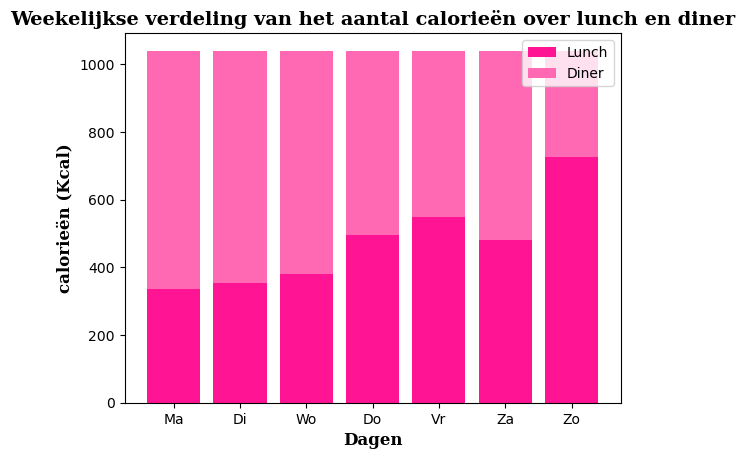

In [12]:
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

plt.bar(DAGPLT, Kcal_lunch, color='deeppink', linewidth = 1.5)
plt.bar(DAGPLT, Kcal_diner, bottom=Kcal_lunch, color='hotpink')
plt.xlabel('Dagen', fontdict = font2)
plt.ylabel('calorieën (Kcal)', fontdict = font2)
plt.title("Weekelijkse verdeling van het aantal calorieën over lunch en diner", fontdict = font1)
plt.legend(["Lunch", "Diner"])
plt.show()
#Figuur.savefig('Kcal_verloop_per_week_V2.jpeg', dpi = 100)